In [1]:
from IPython.display import Image
from IPython.core.display import HTML
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import roots_laguerre

In [14]:
def euler(t,tf,h,U,func):
    Uv = []
    tv = [t]
    Uv.append(np.array(U,dtype=float))
    while t > tf:
        k1 = h*func(t, U)
        U += k1
        t += h
        Uv.append(np.array(U,dtype=float))
        tv.append(t)
    return tv, Uv

### We say that a functiony = y(x) grows at a rate μ if it satisfies the differential equation dydt = μy and that it decays at a rate ρ if it satisfies the differential equation dydt = −ρy.

##### (a)  Plot  the  line z = −ρy where z = dydt is  treated  as  the  dependent  variable  and y >0 is treated as the independent variable.

In [15]:
α = 0.75 # modifies the output function, as in how much output we get out given our capital
δ = 0.05 # represents the depreciation of capital
x = 0.02 # represents the cost of technological upkeep
b = 0.5  # b represents the upper bound of present bias
ρ = 0.02 # represents the amount of base utility we get without present bias affecting it
γ = 0.5  # represents how effective present bias is (in the short-term)
τ = 0.0  # represents the current day, where τ=0 means time starts today 
n = 0.01 # represents the cost of effective worker upkeep
λ = 0.036528 # represents present bias

In [16]:
def F(t,U):
    # dU/dt = F(t,U)
    return np.array([b-γ*U[0]])

##### (b)  Solve the IVP dy/dt = b−γy with y(0) = 0.

In [17]:
#set the dimensions of the window for the slope field
x = np.linspace(0, 10, 20) # Locations of x-coordinates
y = np.linspace(0, 2, 20) # Locations of y-coordinates
xx, yy = np.meshgrid(x, y) # meshgrid returns two 2D arrays

#set the functions
u = xx          # dx/dt
v = b-γ*yy # dy/dt = y(5-2p)

#plot equations
n = np.sqrt(u**2+v**2)+np.finfo(float).eps # add machine zero to avoid division by 0 (hack) - normalizes the arrows
#plt.quiver(x, y, u/n, v/n, color='black') # Plot the vector field

#add details to graph
#plt.xlabel('x') # Add a label for the x-axis
#plt.ylabel('y') # Add a label for the y-axis
#plt.title('logistic model for population growth') # Add a title


[-0.03897117]


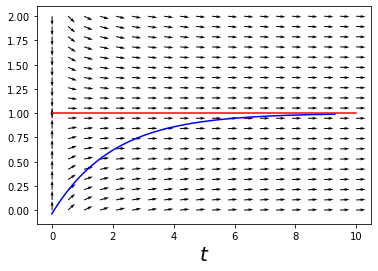

In [24]:
plt.quiver(x, y, u/n, v/n, color='black') # Plot the vector field

# To-Do: write algorithm that takes time and returns correct perturbation that shoots back to correct (k0,c0) 

# Solve the system
t0, tf, h = 0, 9.3, -0.01
#U0 = [0]
#U0 = [0.9933793]
perterbation = 0.01
U0 = [b/γ-perterbation]
t, U = euler(tf,t0,h,U0,F)
pred = np.array(U)[:,0]
plt.plot(t,pred,'b')
plt.xlabel('$t$',size=20);
#plt.legend(bbox_to_anchor=(1.05,1),loc=2);
plt.plot([0,10],[b/γ,b/γ],'r');
print(U[-1])

##### (c)  Solve the IVP dydt = b−γy with y(0) = e^τ.

In [ ]:
r=1
#set the dimensions of the window for the slope field
x = np.linspace(0, 10, 20) # Locations of x-coordinates
y = np.linspace(0, 3, 20) # Locations of y-coordinates
xx, yy = np.meshgrid(x, y) # meshgrid returns two 2D arrays

#set the functions
u = xx          # dx/dt
v = -r*yy # dy/dt = y(5-2p)

#plot equations
n = np.sqrt(u**2+v**2)+np.finfo(float).eps # add machine zero to avoid division by 0 (hack) - normalizes the arrows
#plt.quiver(x, y, u/n, v/n, color='black') # Plot the vector field

#add details to graph
#plt.xlabel('x') # Add a label for the x-axis
#plt.ylabel('y') # Add a label for the y-axis
#plt.title('logistic model for population growth') # Add a title


In [ ]:
plt.quiver(x, y, u/n, v/n, color='black') # Plot the vector field

# Solve the system
t0, tf, h = 0, 10, 0.01
#U0 = [np.exp(x)]
U0 = [np.exp(1)]
t, U = euler(t0,tf,h,U0,F)
pred = np.array(U)[:,0]
plt.plot(t,pred,'b')
plt.xlabel('$t$',size=20);
#plt.legend(bbox_to_anchor=(1.05,1),loc=2);

# Gauss-Laguerre Quadrature (method of numerical integration)

##### using the approximation of the integral from this method:

# $\int_{0}^{+\infty} e^{-x} f(x) d x \approx \sum_{i=1}^{n} w_{i} f\left(x_{i}\right)$

In [ ]:

def gauss_laguerre_quadrature(f,conversion,N):
    
    x,w = roots_laguerre(N)
    
    #x=0.02
    
    #need to become e^(-x)
    x=x*conversion
    w=w*conversion

    return sum(f(x)*w)

### we can approximate Ω which is defined as:

$\Omega=e^{-(b / \gamma)} \int_{0}^{\infty} e^{(b / \gamma)\left(e^{-\gamma v}\right)} e^{-\rho v} d v$

### And adding n for the effective workers we get:

$\Omega \equiv \int_{0}^{\infty} e^{-[(\rho-n) v+\phi(v)]} d v$
 
### where 𝜙(𝑣)  is defined as:

$\phi(v)=(b / \gamma) \cdot\left(1-e^{-\gamma v}\right)$ 

which represents present bias.

In [ ]:
# f(x) = e^(-phi'(v))
def f(x):
    return np.exp( -((b/γ)*(1-np.exp(-γ*x))))

### we get 𝜆 which basically represents our current appreciation of the capital:

$\lambda=n+(1 / \Omega)$

more technically, 𝜆 represents the "effective" rate of time preference, effective implying we are linearlizing the time preference to find its approximation i.e. how much present bias is effecting our decision. It will be a lot in the short term and less in the long term.

and where ρ ≤ 𝜆 ≤ ρ+𝜙'(0) and ρ would be our general appreciation without present bias

##### 𝜆 plays a role in finding the steady state solutions for 𝑘˙ and 𝑐˙ which are defined as:

$ \begin{array}{l}
\dot{c}=c\left(\alpha k^{\alpha-1}-\delta-x-\rho-b e^{-\gamma(t-\tau)}\right) \\
\dot{k}=k^{\alpha}-c-(\delta+x+n) k
\end{array}$

To find the steady state solutions, the above equations are set equal to zero. Also, instead of finding the steady state solutions using $\rho-b e^{-\gamma(t-\tau)}$ , we will use the lower and upper bounds of 𝜆 instead. This means, when solving for our short-term steady state, we solve these equations:

$\begin{array}{l}
0=\alpha k^{\alpha-1}-\delta-x-\lambda \\
0=k^{\alpha}-c-(\delta+x+n) k
\end{array}$

which will give us the steady state solutions when no commitment technologies are used and there is present bias i.e. $k_{0}^{*}$ and $C_{0}^{*}$ represent the short-term steady states

##### To find our long term steady state solutions, 𝜆 becomes just 𝜌 and we solve these equations:

$\begin{array}{l}
0=\alpha k^{\alpha-1}-\delta-x-\rho \\
0=k^{\alpha}-c-(\delta+x+n) k
\end{array}$

which gives us $k_{\infty}^{*}$ and $C_{\infty}^{*}$ which are our long-term steady-state solutions.

This means that $\left(k_{\infty}^{*}-k_{0}^{*}\right) / k_{0}^{*}$ is the relative measure between our long-term capital and our short-term capital. In other words, this is the difference between our long-term steady state and our short-term steady state. The same applies to the relative measure of consumption,  $\left(c_{\infty}^{*}-c_{0}^{*}\right) / c_{0}^{*}$ .

In [ ]:
γ, b, ρ, n, d, x = 0.5, 0.5, 0.02, 0.01, 0.05, 0.02

to explain these constants, b represents the present bias added to 𝜆, γ is how effective present bias is when functional, 𝛿 is the depreciation of capital, and x is the cost of technological upkeep. n is the number of effective workers there are, and is negative because of the capital needed to sustain them. For recap, ρ is the lower bound of our appreciation for whatever the capital is. 

In [ ]:
#confirming we are on the right track, computing Ω without n:
N=100
convertWith = 1/ρ
Ω = gauss_laguerre_quadrature(f,convertWith,N)
print(f'Ω ≈ {Ω}')

##### Changing the upper-bound of 𝜆  as well as the output function by way of α, we get these values:

In [ ]:
data = [[0.75,0.75,0.75, 0.33, 0.33, 0.33],
        [ 0.5, 0.2, 0.1,  0.5,  0.2,  0.1],
        [],
        [],
        []]

λ_data = []
b_data = data[1]

for b in b_data:
    convertWith = 1/(ρ-n)
    Ω = gauss_laguerre_quadrature(f,convertWith,N)
    λ = n + 1/Ω
    λ_data.append(λ)
data[2] = λ_data

alpha = data[0]
k_relative_measure = []
c_relative_measure = []

for i in range(6):
    kinf = ((d+x+ρ)/alpha[i])**(1/(alpha[i]-1))
    cinf = kinf**alpha[i]-(d+x+n)*kinf
    print(kinf)
    print(cinf)
    
    k0=((d+x+λ_data[i])/alpha[i])**(1/(alpha[i]-1))
    c0 = k0**alpha[i]-(d+x+n)*k0
    #print(k0)
    #print(c0)
    
    k_rm = (kinf-k0)/k0
    c_rm = (cinf-c0)/c0
    k_relative_measure.append(k_rm)
    c_relative_measure.append(c_rm)
    
    
data[3] = k_relative_measure
data[4] = c_relative_measure

table = pd.DataFrame(data, columns=["(1)","(2)","(3)","(4)","(5)","(6)"], 
                     index = ["α","b = φ'(0)", "λ", 
                              '<img src="https://cdn.discordapp.com/attachments/557363729759469578/726067490941304932/unknown.png" alt="img">', 
                              '<img src="https://cdn.discordapp.com/attachments/557363729759469578/726084138192339024/unknown.png" alt="img">'])
display(HTML(table.to_html(escape=False)))